#### Machine learning for mental Health

###### The project involves machine learning models that can assist in predicting mental health conditions, analyzing mental health-related data and creating tools that help in diagnosing or monitoring mental health conditions.


###### Our main objective is to predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset? 

###### Output Label is = seek_help 
###### Features = Age, Gender, self_employed, family_history, treatment, no_employees remote_work,tech_company, benefits, care_options, wellness_program seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence coworkers, supervisor, mental_health_interview, phys_health_interview mental_vs_physical, obs_consequence

#### Imports

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



#### Data Preprocessing

In [154]:
path = 'survey.csv'
data = pd.read_csv(path)

In [155]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [156]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [158]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [159]:
data.drop(['comments','work_interfere', 'state', 'Timestamp'],  axis=1, inplace=True)

In [160]:
data.isna().sum()

Age                           0
Gender                        0
Country                       0
self_employed                18
family_history                0
treatment                     0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [161]:
# Assuming your DataFrame is called 'Data'
missing_percentages = (data.isna().mean() * 100).round(2)

print(missing_percentages)

Age                          0.00
Gender                       0.00
Country                      0.00
self_employed                1.43
family_history               0.00
treatment                    0.00
no_employees                 0.00
remote_work                  0.00
tech_company                 0.00
benefits                     0.00
care_options                 0.00
wellness_program             0.00
seek_help                    0.00
anonymity                    0.00
leave                        0.00
mental_health_consequence    0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
mental_health_interview      0.00
phys_health_interview        0.00
mental_vs_physical           0.00
obs_consequence              0.00
dtype: float64


##### Cleaning the NaN values

In [162]:
df_clean = data.dropna()
print(df_clean)

      Age Gender         Country self_employed family_history treatment  \
18     46   male   United States           Yes            Yes        No   
19     36   Male          France           Yes            Yes        No   
20     29   Male   United States            No            Yes       Yes   
21     31   male   United States           Yes             No        No   
22     46   Male   United States            No             No       Yes   
...   ...    ...             ...           ...            ...       ...   
1254   26   male  United Kingdom            No             No       Yes   
1255   32   Male   United States            No            Yes       Yes   
1256   34   male   United States            No            Yes       Yes   
1257   46      f   United States            No             No        No   
1258   25   Male   United States            No            Yes       Yes   

        no_employees remote_work tech_company benefits  ...   anonymity  \
18               1-5    

In [163]:
df_clean.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Now, our data does not contain any missing values !!

##### Encoding data

In [164]:
# Iterate through each column in the DataFrame
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    print(f'Column "{column}" has {len(unique_values)} unique values: {unique_values}')

Column "Age" has 53 unique values: [         46          36          29          31          41          33
          35          34          37          32          30          42
          40          27          38          50          24          18
          28          26          22          44          23          19
          25          39          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Column "Gender" has 49 unique values: ['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Ag

In [165]:
# LabelEncoder from scikit-learn
le = LabelEncoder()

1 - Age column

In [166]:
unique_values_age = df_clean['Age'].unique()
print(unique_values_age)

[         46          36          29          31          41          33
          35          34          37          32          30          42
          40          27          38          50          24          18
          28          26          22          44          23          19
          25          39          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [167]:
# Clean the Age column by removing invalid values
df = df_clean[(df_clean['Age'] >= 0) & (df_clean['Age'] <= 120)]

# Encode the Age column using label encoding
df['Age'] = le.fit_transform(df['Age'])

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/3839534916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = le.fit_transform(df['Age'])


In [168]:
print(df['Age'].unique())

[31 21 14 16 26 18 20 19 22 17 15 27 25 12 23 35  9  3 13 11  7 29  8  4
 10 24 30  6 28 40 43 38 39 33  5 41 42 32 45 36 46 34  0 37 44  1  2 47]


Now, our age column is encoded and has no invalid values

2 - Gender column

In [169]:
df_clean['Gender'] = np.where(df_clean['Gender'].isin(['Femake', 'Female (cis)','femail','cis-female/femme','Female (trans)','Trans woman' ,'woman','f', 'F', 'Female' ,'female'  , 'Trans-female','Cis Female', 'Woman' 'f' 'queer/she/they' ]), 'female', 
                              np.where(df_clean['Gender'].isin(['m', 'M', 'male' ,'Male', 'M', 'm' ,'Male-ish' ,'maile', 'Mal', 'Cis Male','Male (CIS)', 'Make', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Man', 'msle', 'Mail', 'cis male', 'Malr','Cis Man']), 
                                                 'male', 'other'))
df_clean['Gender'].unique()


/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/509895641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender'] = np.where(df_clean['Gender'].isin(['Femake', 'Female (cis)','femail','cis-female/femme','Female (trans)','Trans woman' ,'woman','f', 'F', 'Female' ,'female'  , 'Trans-female','Cis Female', 'Woman' 'f' 'queer/she/they' ]), 'female',


array(['male', 'female', 'other'], dtype=object)

In [170]:
print(df_clean.shape)
print(df.shape)

(1241, 23)
(1236, 23)


In [171]:
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])
df_clean['Gender'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1858732997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender'] = le.fit_transform(df_clean['Gender'])


array([1, 0, 2])

3 - Self employed 

In [172]:
df['self_employed'].unique()

array(['Yes', 'No'], dtype=object)

In [173]:
df['self_employed'] = le.fit_transform(df['self_employed'])
df['self_employed'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/3584590923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['self_employed'] = le.fit_transform(df['self_employed'])


array([1, 0])

4 - family history

In [174]:
data['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [175]:
df['family_history'] = le.fit_transform(df['family_history'])
df['family_history'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1470295165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family_history'] = le.fit_transform(df['family_history'])


array([1, 0])

5 - Country 

In [176]:
df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Canada', 'Portugal',
       'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany',
       'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria',
       'Ireland', 'India', 'South Africa', 'Italy', 'Bulgaria', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
       'Georgia', 'China', 'Czech Republic', 'Philippines'], dtype=object)

In [177]:
df['Country'] = le.fit_transform(df['Country'])
df['Country'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/2217507493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = le.fit_transform(df['Country'])


array([45, 15, 44,  7, 34, 28, 42, 33,  0, 17, 36, 26,  5, 38, 10,  1, 21,
       20, 39, 23,  6, 41,  9, 25, 35,  3, 29, 40, 14, 46, 22,  4, 19, 37,
       24, 30, 11, 31, 43, 13,  2, 18, 27, 16,  8, 12, 32])

6 - Treatment

In [178]:
df['treatment'].unique()

array(['No', 'Yes'], dtype=object)

In [179]:
df['treatment'] = le.fit_transform(df['treatment'])
df['treatment'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1638323731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['treatment'] = le.fit_transform(df['treatment'])


array([0, 1])

7 - no_employees                  

In [180]:
df['no_employees'].unique()

array(['1-5', '6-25', '100-500', '26-100', 'More than 1000', '500-1000'],
      dtype=object)

In [181]:
# fit and transform the 'no_employees' column
df['no_employees'] = le.fit_transform(df['no_employees'])
df['no_employees'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/3784638784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_employees'] = le.fit_transform(df['no_employees'])


array([0, 4, 1, 2, 5, 3])

8 - remote_work                   

In [182]:
df['remote_work'].unique()

array(['Yes', 'No'], dtype=object)

In [183]:
df['remote_work'] = le.fit_transform(df['remote_work'])
df['remote_work'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/44412522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remote_work'] = le.fit_transform(df['remote_work'])


array([1, 0])

9 - tech_company                  

In [184]:
df['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [185]:
df['tech_company'] = le.fit_transform(df['tech_company'])

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/451578756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tech_company'] = le.fit_transform(df['tech_company'])


10 - benefits                      

In [186]:
df['benefits'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [187]:
df['benefits'] = le.fit_transform(df['benefits'])
df['benefits'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1343757777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benefits'] = le.fit_transform(df['benefits'])


array([2, 1, 0])

11 - care_options                  

In [188]:
df['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [189]:
df['care_options'] = le.fit_transform(df['care_options'])
df['care_options'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1986378819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['care_options'] = le.fit_transform(df['care_options'])


array([1, 0, 2])

12 - wellness_program              


In [190]:
df['wellness_program'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [191]:
df['wellness_program'] = le.fit_transform(df['wellness_program'])

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/56246851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wellness_program'] = le.fit_transform(df['wellness_program'])


13 - seek_help                     


In [192]:
df['seek_help'].unique()

array(["Don't know", 'No', 'Yes'], dtype=object)

In [193]:
df['seek_help'] = le.fit_transform(df['seek_help'])
df['seek_help'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1472969595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seek_help'] = le.fit_transform(df['seek_help'])


array([0, 1, 2])

14 - anonymity                     


In [194]:
df['anonymity'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [195]:
df['anonymity'] = le.fit_transform(df['anonymity'])
df['anonymity'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/313474880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anonymity'] = le.fit_transform(df['anonymity'])


array([2, 1, 0])

15 - leave                         


In [196]:
df['leave'].unique()

array(['Very easy', 'Somewhat easy', 'Somewhat difficult', "Don't know",
       'Very difficult'], dtype=object)

In [197]:
df['leave'] = le.fit_transform(df['leave'])
df['leave'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/2646453131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['leave'] = le.fit_transform(df['leave'])


array([4, 2, 1, 0, 3])

16 - mental_health_consequence     


In [198]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [199]:
df['mental_health_consequence'] = le.fit_transform(df['mental_health_consequence'])
df['mental_health_consequence'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/2442125099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mental_health_consequence'] = le.fit_transform(df['mental_health_consequence'])


array([1, 0, 2])

17 - phys_health_consequence      

In [200]:
df['phys_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [201]:
df['phys_health_consequence'] = le.fit_transform(df['phys_health_consequence'])
df['phys_health_consequence'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/2626023188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phys_health_consequence'] = le.fit_transform(df['phys_health_consequence'])


array([1, 0, 2])

18 - coworkers                     

In [202]:
df['coworkers'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

In [203]:
df['coworkers'] = le.fit_transform(df['coworkers'])
df['coworkers'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/3410550575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coworkers'] = le.fit_transform(df['coworkers'])


array([2, 1, 0])

19 - supervisor                    


In [204]:
df['supervisor'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

In [205]:
df['supervisor'] = le.fit_transform(df['supervisor'])
df['supervisor'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/3281951281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['supervisor'] = le.fit_transform(df['supervisor'])


array([2, 1, 0])

20 - mental_health_interview      


In [206]:
df['mental_health_interview'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [207]:
df['mental_health_interview'] = le.fit_transform(df['mental_health_interview'])
df['mental_health_interview'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1384150716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mental_health_interview'] = le.fit_transform(df['mental_health_interview'])


array([1, 0, 2])

21 - phys_health_interview        

In [208]:
df['phys_health_interview'].unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

In [209]:
df['phys_health_interview'] = le.fit_transform(df['phys_health_interview'])
df['phys_health_interview'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/2957460899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phys_health_interview'] = le.fit_transform(df['phys_health_interview'])


array([2, 0, 1])

22 - mental_vs_physical            


In [210]:
df['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [211]:
df['mental_vs_physical'] = le.fit_transform(df['mental_vs_physical'])
df['mental_vs_physical'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/1163211162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mental_vs_physical'] = le.fit_transform(df['mental_vs_physical'])


array([2, 0, 1])

23 - obs_consequence 

In [212]:
df['obs_consequence'].unique()

array(['Yes', 'No'], dtype=object)

In [213]:
df['obs_consequence'] = le.fit_transform(df['obs_consequence'])
df['obs_consequence'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_23093/3237046646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obs_consequence'] = le.fit_transform(df['obs_consequence'])


array([1, 0])

### Explore and visualize data : exploratory data analysis (EDA)


In [214]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,31,male,45,1,1,0,0,1,1,2,...,2,4,1,1,2,2,1,2,2,1
19,21,Male,15,1,1,0,4,1,1,1,...,2,2,1,1,1,1,0,0,0,0
20,14,Male,45,0,1,1,1,0,1,2,...,1,1,0,1,1,1,1,1,1,0
21,16,male,45,1,0,0,0,1,1,1,...,2,1,1,1,1,1,1,0,2,0
22,31,Male,45,0,0,1,2,1,1,2,...,0,0,0,1,1,2,1,0,1,0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 18 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1236 non-null   int64 
 1   Gender                     1236 non-null   object
 2   Country                    1236 non-null   int64 
 3   self_employed              1236 non-null   int64 
 4   family_history             1236 non-null   int64 
 5   treatment                  1236 non-null   int64 
 6   no_employees               1236 non-null   int64 
 7   remote_work                1236 non-null   int64 
 8   tech_company               1236 non-null   int64 
 9   benefits                   1236 non-null   int64 
 10  care_options               1236 non-null   int64 
 11  wellness_program           1236 non-null   int64 
 12  seek_help                  1236 non-null   int64 
 13  anonymity                  1236 non-null   int64 
 14  leave  

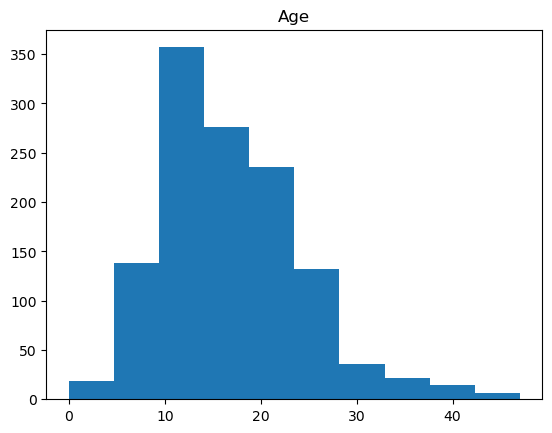

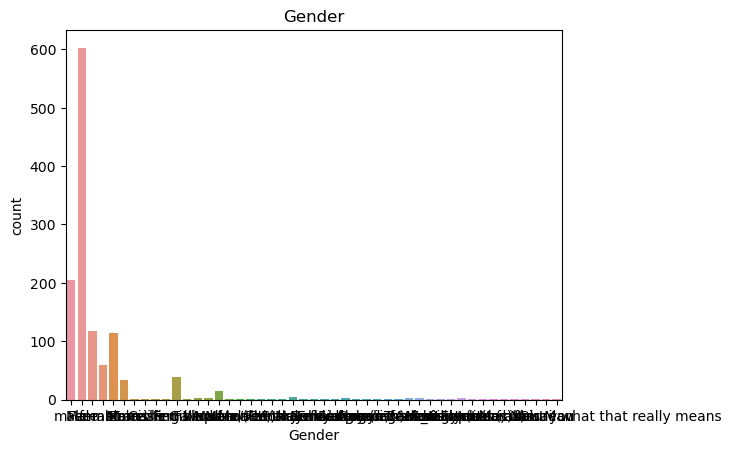

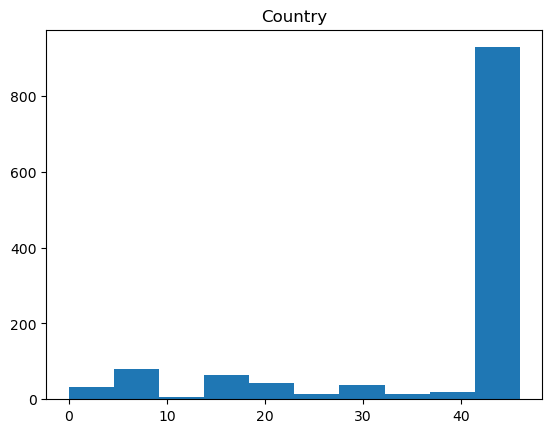

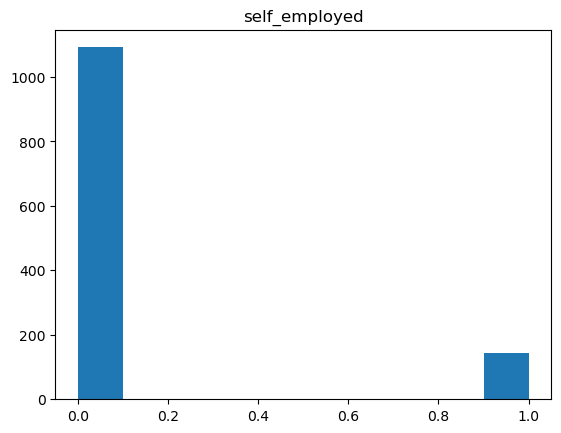

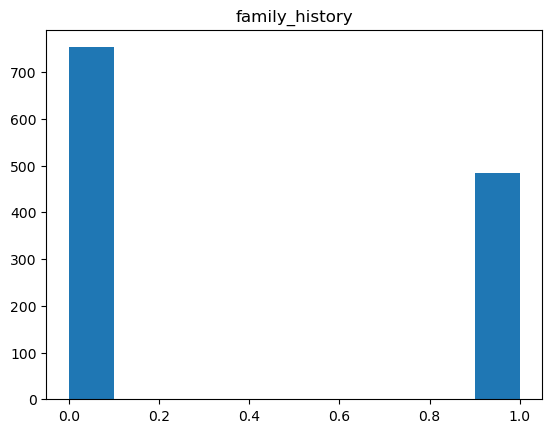

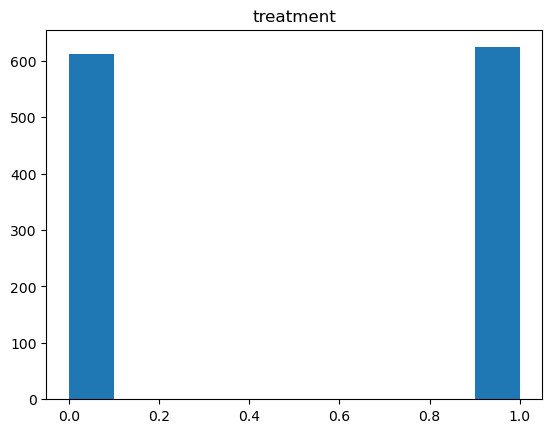

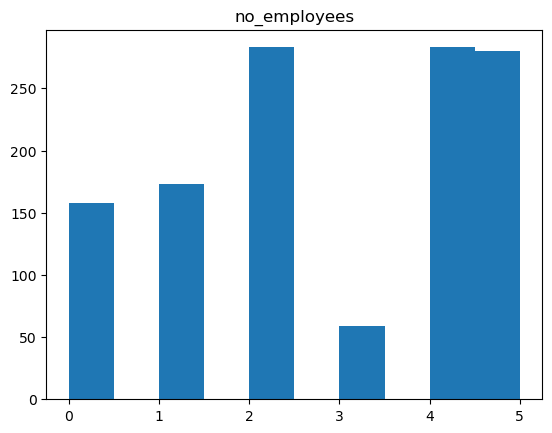

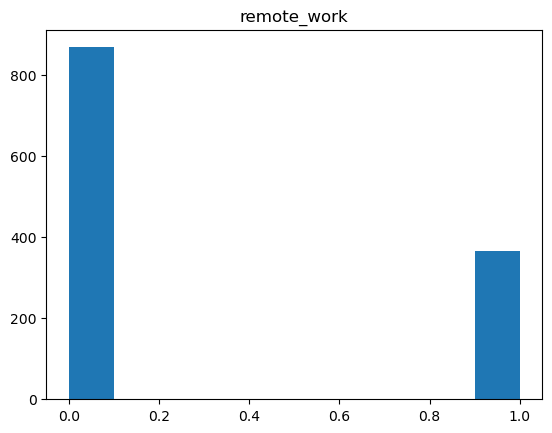

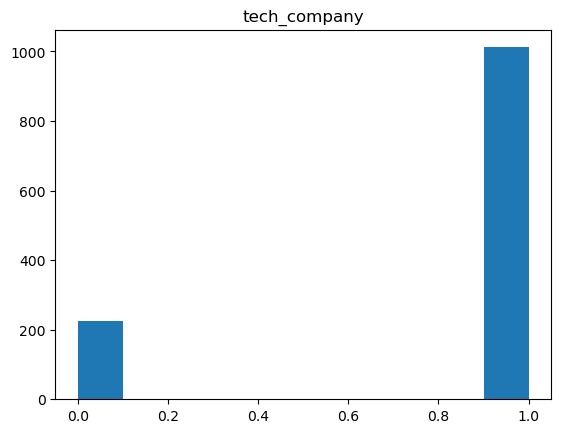

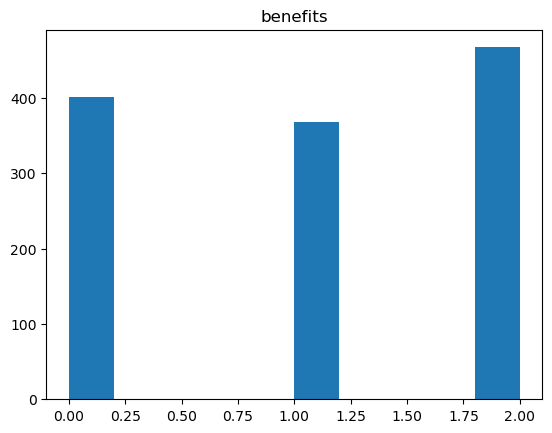

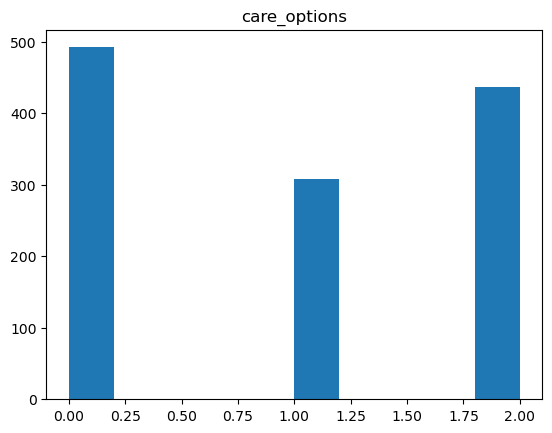

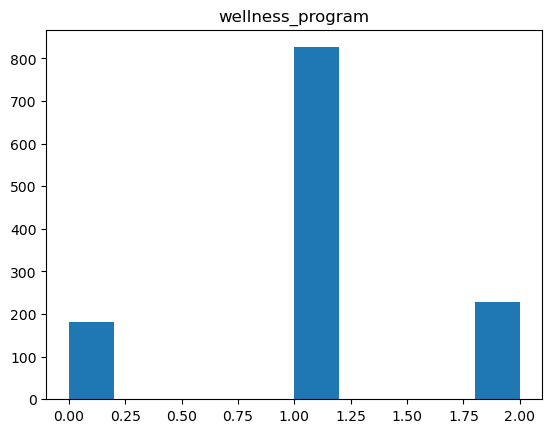

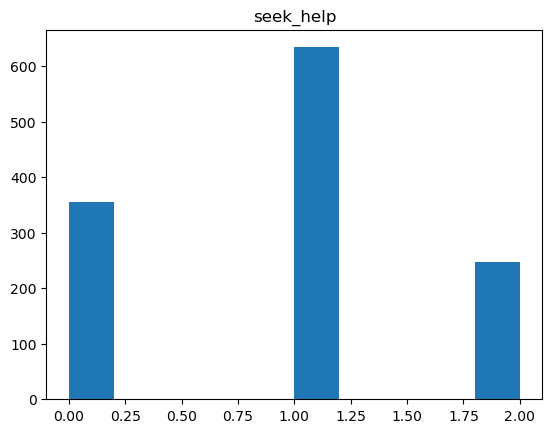

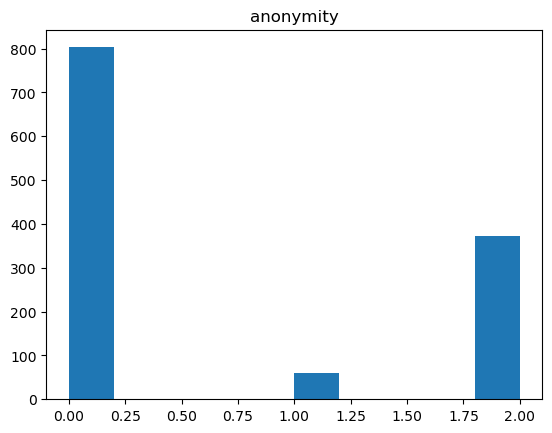

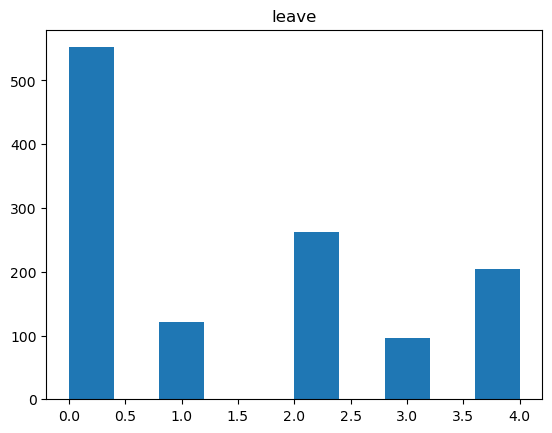

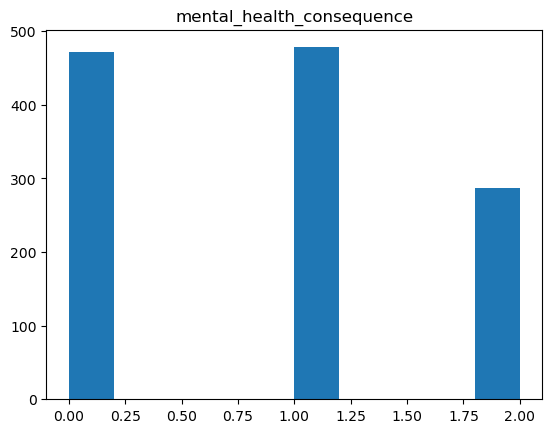

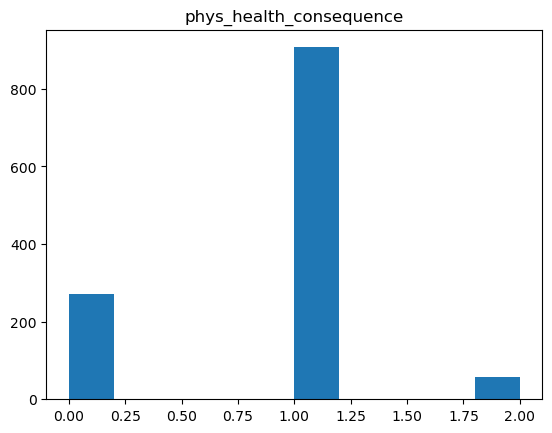

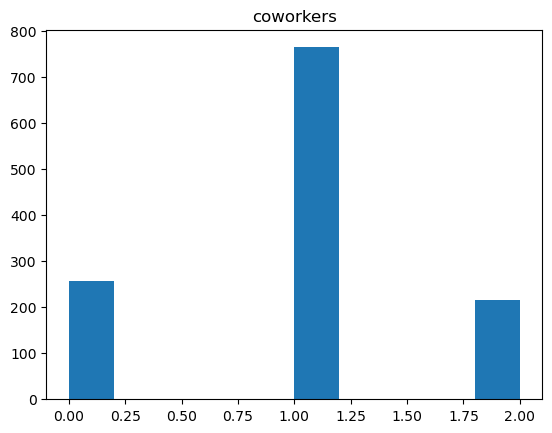

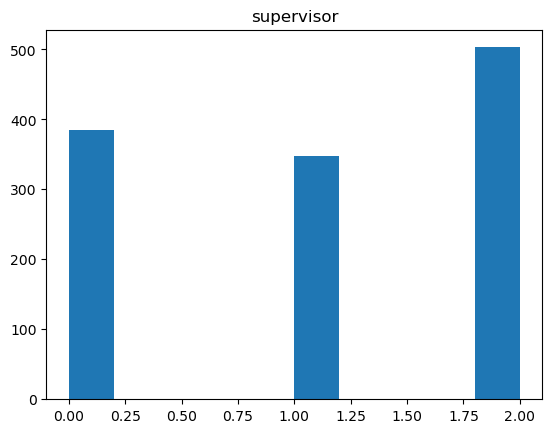

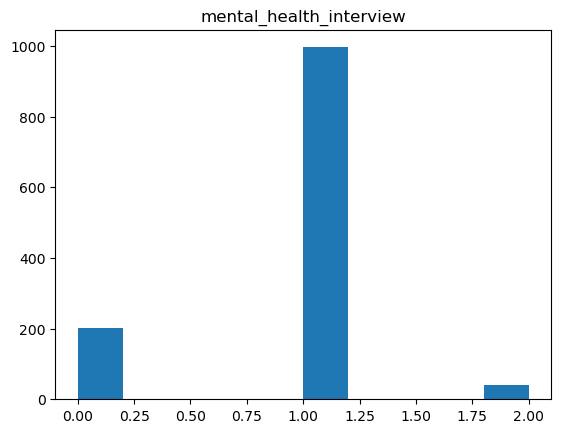

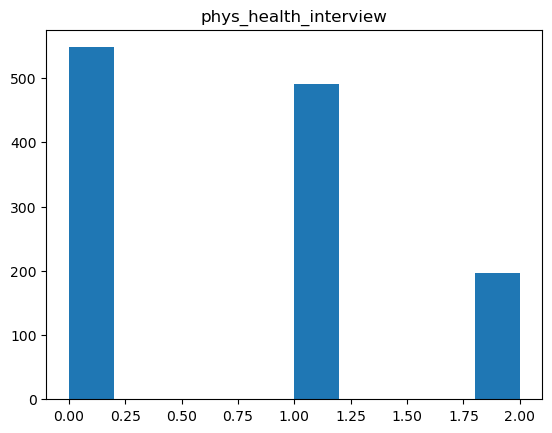

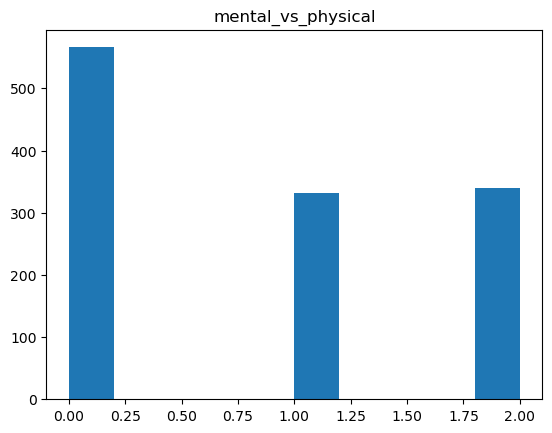

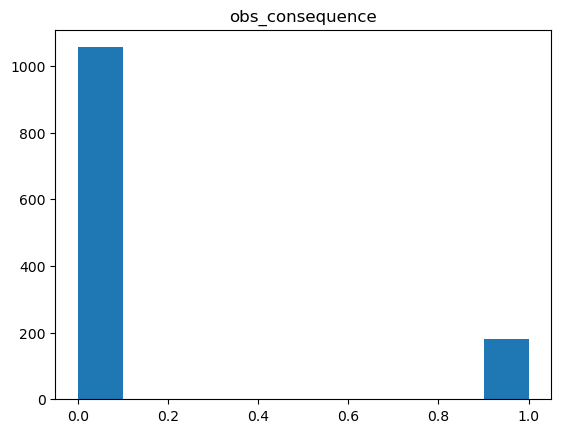

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# iterate over each column
for col in df.columns:
    # check if the column is numerical
    if df[col].dtype in ['int64', 'float64']:
        # plot a histogram
        plt.hist(df[col])
        plt.title(col)
        plt.show()
       
    # if the column is categorical
    else:
        # plot a bar chart
        sns.countplot(x=df[col])
        plt.title(col)
        plt.show()


#### Scaling and fitting

### Feature Engineering

### Model Selection 

### Model Training and evaluation 

### Model tuning

### Conclusions